In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display
import mglearn

In [4]:
from sklearn.datasets import load_iris
    #sklearn 에는 KNN이 있다
    #mglearn 에는 make_forge() 가 있다
iris_dataset = load_iris()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)
    #훈련 데이터(X_train, y_train)와 테스트 데이터(X_test, y_test)를 train_test_split()를 통해 나눈다

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020251587F48>,
      dtype=object)

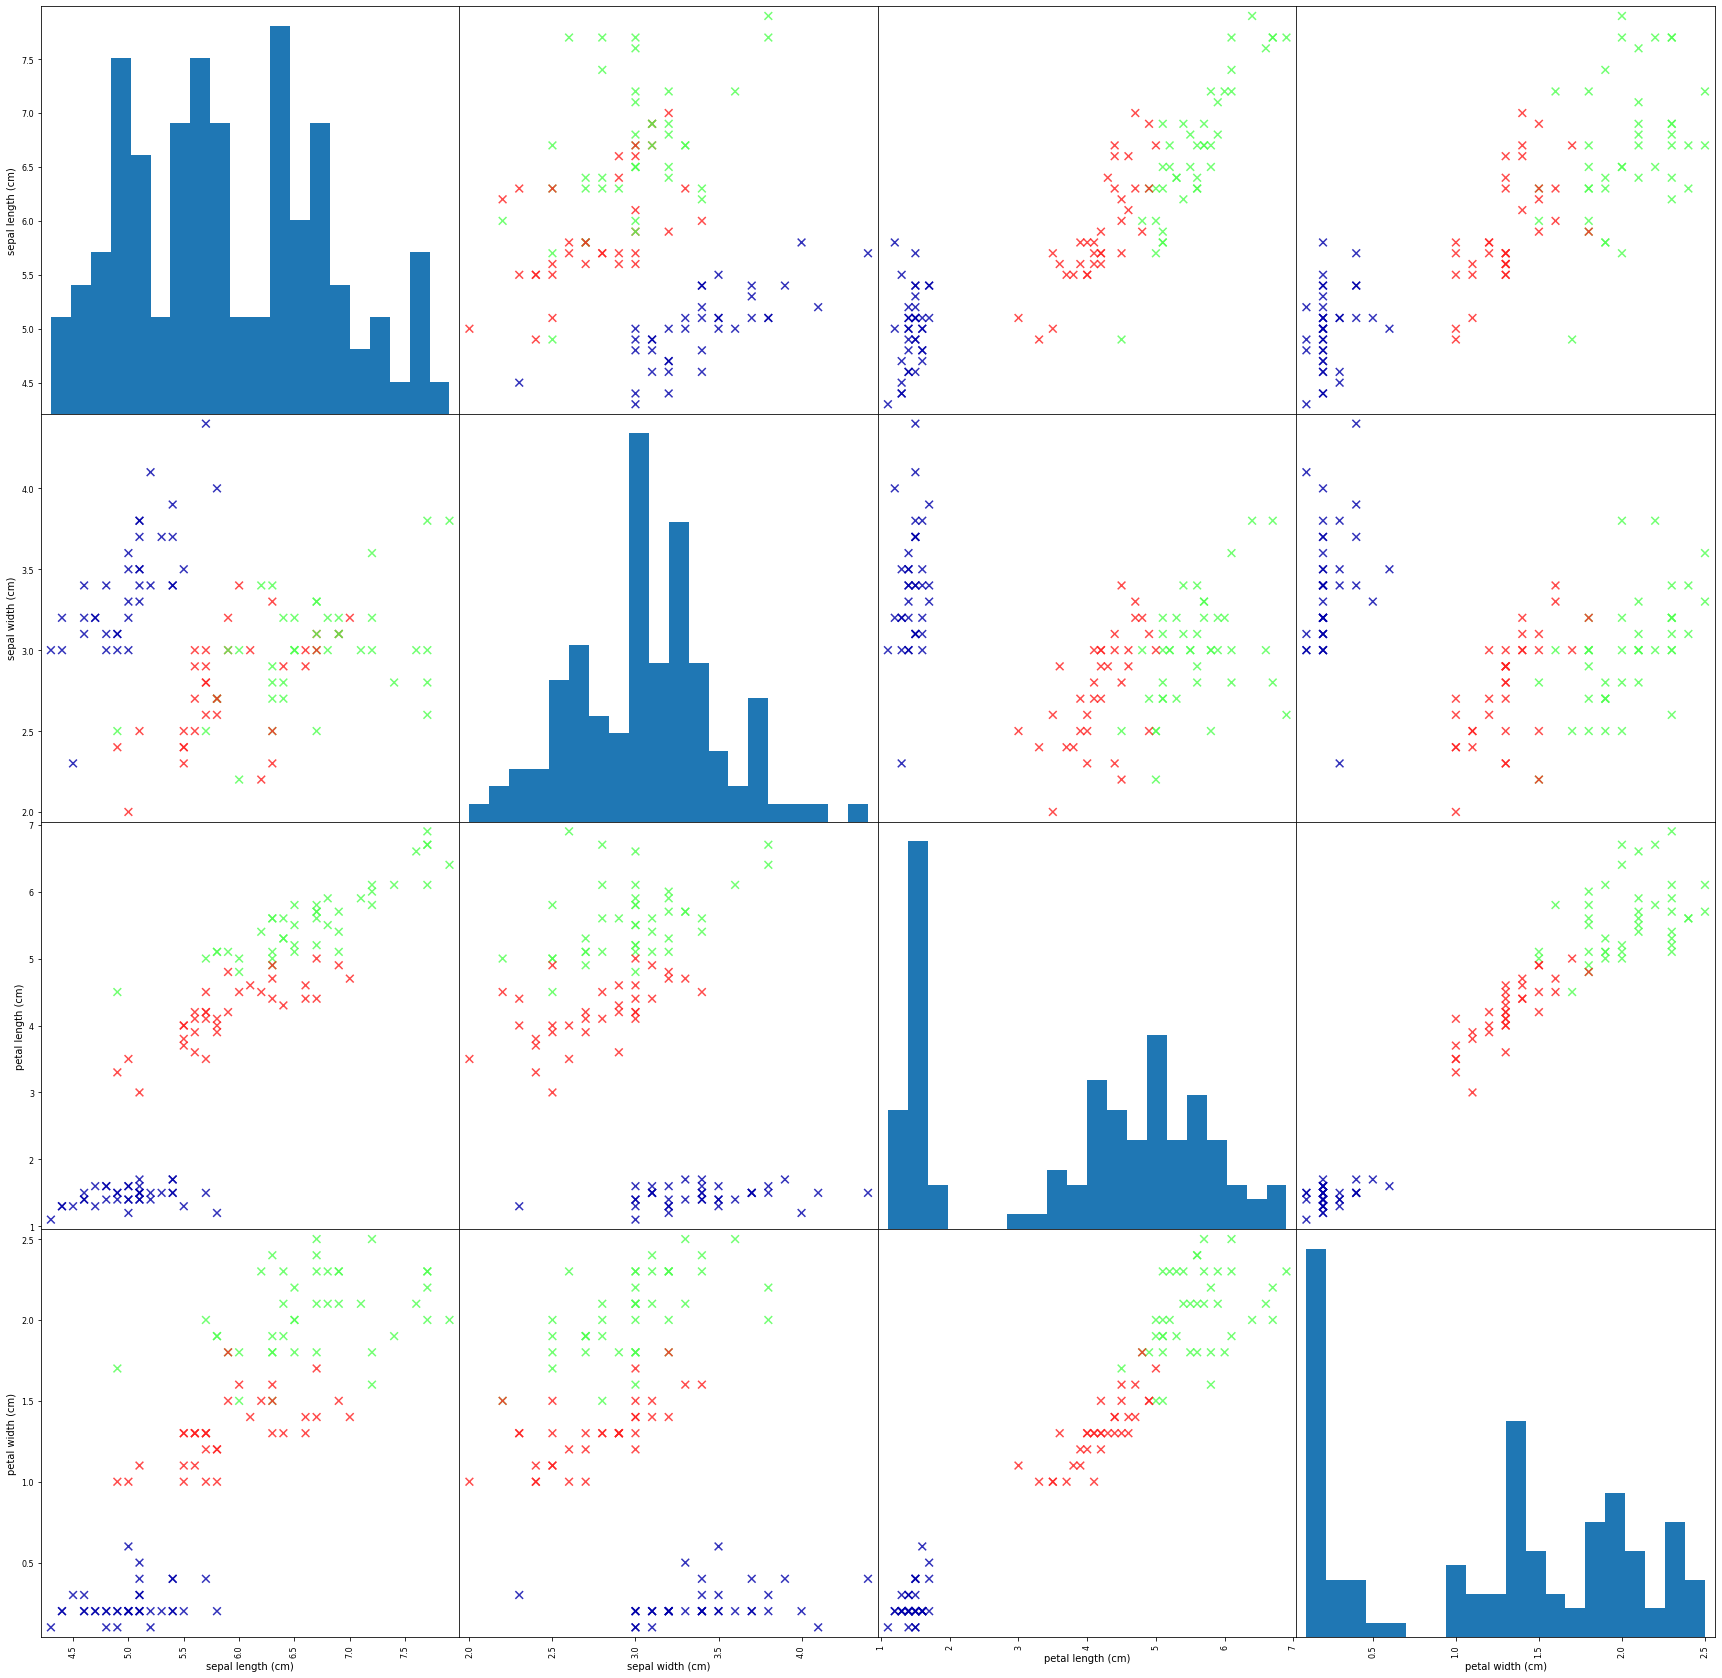

In [6]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
    #ndarray -> DataFrame 타입으로 변환
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (30, 30), marker = 'x', \
                          hist_kwds = {'bins': 20}, s = 60, alpha = .8, cmap = mglearn.cm3)
    #y_train: target_name에 따라 색으로 구분된 산점도 행렬 만들기

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
    #knn 객체는 훈련 데이터로 모델을 만들고 새로운 데이터 포인트에 대한 예측하는 알고리즘을 캡슐화한 것이다

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [9]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new: {}".format(iris_dataset['target_names'][knn.predict(X_new)]))
    #새로운 데이터(X_new)의 레이블 예측하기 by knn.predict(data: ndarray)

X_new: ['setosa']


In [10]:
y_pred = knn.predict(X_test)    #X_test.shape == (38, 4)
    #knn.predict()의 인자로 X_new: (1, 4)말고도 X_test: (38, 4)를 넣어도 된다
print(y_pred.shape)    #[2 1 0 2 0 ...] 같은 ndarray 타입의 예측값 1차원 배열(small_y, (38,))

(38,)


In [11]:
knn.score(X_test, y_test)  
    #X_test.shape == ndarray, (38, 4) 
    #y_test.shape == ndarray, (38,)
    #score is 0.9736...

0.9736842105263158

In [12]:
#SUMMARY
#1. sklearn.datasets.load_iris()
#2. X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split()
#3. knn = sklearn.neighbors.KNeighborsClassifier()
#4. knn.fit(X_train, y_train)
#5. knn.predict(X_test)
#6-1. np.mean(knn.predict(X_test) == y_test)
#6-2. knn.score(X_test, y_test)

# 모델을 구축하기 위해 이미 구분되어진 데이터셋을 사용했으므로 "지도학습" (세 개의 클래스를 "분류(Classification)")